## Q Learning Example "Notausgang"
ZHAW Init Luc Schreiber, EVA1 27.12.2019

In [1]:
import numpy as np
import random
from random import randrange
import matplotlib
from matplotlib import pyplot
from matplotlib.pyplot import arrow
import matplotlib.patches as patches
import math

In [2]:
# Define Reward Matrix
reward_mat = np.array([[-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1],[-1,-1,-1,-1,50],[-1,-1,-1,-1,-1]])

In [3]:
reward_mat

array([[-1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1],
       [-1, -1, -1, -1, 50],
       [-1, -1, -1, -1, -1]])

In [4]:
Q = np.random.rand(25,4)

In [7]:
LEARNING_RATE = 0.7
GAMMA = 0.95
ACTION_VALUES = [0,1,2,3] # go left, go up, go right, go down
EPSILON = 0.5
TARGET_X_COORD = 4
TARGET_Y_COORD = 3

def q_iteration(Q):
    # Initial State
    state_x_0 = random.randint(0,4)
    state_y_0 = random.randint(0,4)
    
    
    while True:
        # Check if already on target
        if state_x_0 == TARGET_X_COORD and state_y_0 == TARGET_Y_COORD:
            # Get reward from reward matrix
            r = reward_mat[state_y_0,state_x_0]
            
            # Get row idx (q-table has the shape 25x4)
            q_row_idx = state_y_0 * 5 + state_x_0
            
            # Update Q-Function
            Q[q_row_idx,] = r
            return(Q)

        s_old = state_y_0 * 5 + state_x_0
        r = reward_mat[state_y_0,state_x_0]


        ### Perform action
        
        # Action with the biggest Q-Value
        if np.random.rand(1)[0] > EPSILON:
            a = Q[s_old,].argmax()        
        # Random action
        else:
            a = random.randint(0,3)
        # Perform action and check the boundaries of the environment
        if a == 0: # go left
                if state_x_0 > 0:
                    state_x_0 -= 1

        if a == 1: # go up
            if state_y_0 > 0:
                state_y_0 -= 1

        if a == 2: # go right
            if state_x_0 < 4:
                state_x_0 += 1
        
        if a == 3: # go down
            if state_y_0 < 4:
                state_y_0 += 1
        
        s_new = state_y_0 * 5 + state_x_0
        
        Q[s_old,a] = (1-LEARNING_RATE) * Q[s_old,a] + LEARNING_RATE * (r + GAMMA * Q[s_new,].max())

    return(Q)


In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_V_Values(vmax,target=None):
    X, Y = np.meshgrid(np.arange(0, 5, 1), np.arange(0, 5, 1))
    x_shape = X.shape

    U = np.zeros(x_shape)
    V = np.zeros(x_shape)

    for i in range(x_shape[0]):
        for j in range(x_shape[1]):
            if vmax[i,j] == 0: # go left
                U[i,j] = -1.0
                V[i,j] = 0

            if vmax[i,j] == 1: # go up
                U[i,j] = 0
                V[i,j] = 1

            if vmax[i,j] == 2: # go right
                U[i,j] = 1.0
                V[i,j] = 0

            if vmax[i,j] == 3: # go down
                U[i,j] = 0
                V[i,j] = -1

    fig, ax = plt.subplots()
    q = ax.quiver(X, Y, U, V, units='xy' ,scale=2, color='red')

    ax.set_aspect('equal')
    
    rect = patches.Rectangle((3.75,2.75),0.5,0.5,linewidth=1,edgecolor='b',facecolor='blue')
    ax.add_patch(rect)
    
    plt.xlim(-0.5,4.5)
    plt.ylim(4.5,-0.5)

    plt.title('Direction argmax(Q) in each state',fontsize=10)
    
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels[1] = 'A'; labels[2] = 'B'; labels[3] = 'C'; labels[4] = 'D'; labels[5] = 'E'
    ax.set_xticklabels(labels)
    
    labels = [item.get_text() for item in ax.get_yticklabels()]
    labels[1] = '1'; labels[2] = '2'; labels[3] = '3'; labels[4] = '4'; labels[5] = '5'
    ax.set_yticklabels(labels)
    
    #plt.savefig('how_to_plot_a_vector_field_in_matplotlib_fig1.png', bbox_inches='tight')
    plt.show()
    plt.close()

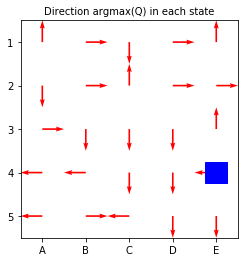

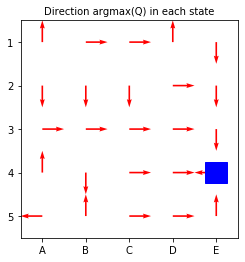

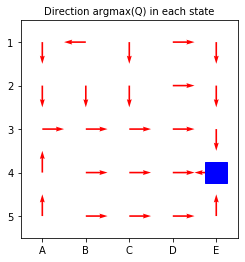

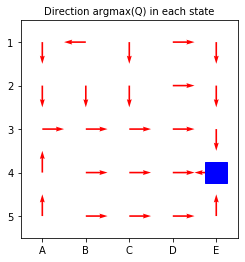

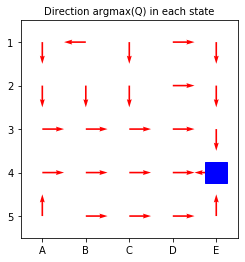

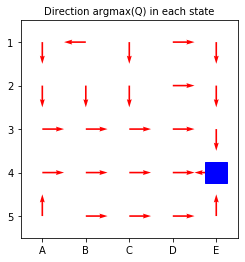

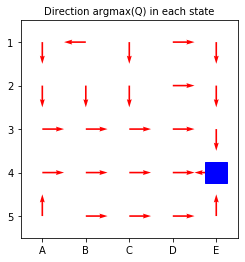

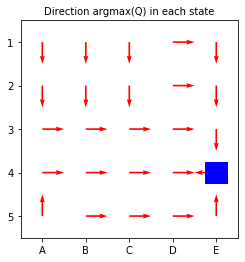

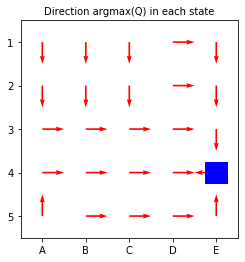

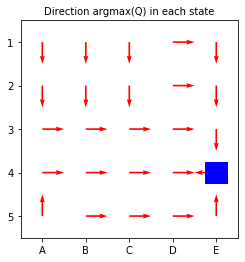

In [10]:
Q = np.random.rand(25,4)
for n in range(0,200):
    Q = q_iteration(Q)
    vmax = Q.argmax(axis=1).reshape(5,5)
    if n % 20 == 0:
        plot_V_Values(vmax)

In [11]:
Q

array([[17.66882924, 23.8496646 , 20.81542683, 28.88361066],
       [26.42404869, 26.21356083, -2.2473642 , 30.5575432 ],
       [24.86726527, 31.44558987, 23.29638484, 34.16466562],
       [31.45400168, 33.17806993, 37.01536798, -1.59978029],
       [34.11336714, 35.92454355, 37.00711958, 40.01625   ],
       [19.80752128, 26.04805466, 31.39820865, 31.45643234],
       [28.78624677, 25.92837049, 34.15390904, 34.16466562],
       [31.37615021, 31.45616774, 37.0154171 , 37.0154375 ],
       [34.16462774, 30.91598794, 40.01625   , 39.98640078],
       [37.01543749, 37.01543749, 40.01624997, 43.175     ],
       [31.44712083, 28.88260186, 34.16466562, 34.13983018],
       [31.45641545, 31.45642943, 37.0154375 , 37.0154206 ],
       [34.16466562, 34.16466561, 40.01625   , 40.01532385],
       [37.0154175 , 37.0154373 , 43.175     , 43.17499999],
       [40.01625   , 40.01625   , 43.175     , 46.5       ],
       [33.88239689, 31.45608726, 37.01543707, 28.39528873],
       [34.04872812, 34.